# Scientific Computing
# Mideterm Project
# The Attractor class
# Done by Sidy Danioko

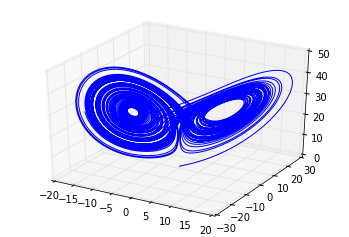

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

class Attractor:

    def __init__(self, s=10.0, p=28.0, b=8.0/3.0, start=0, end=80.0, points=10000):
    
        self.params = np.array([s, p, b])
        self.start = start
        self.end = end
        self.points = points
        self.dt = (end - start)/points
        
    def rhs(self, xyz_arr):
        # In here,let's unpack the data values
        x0, y0, z0 = xyz_arr
        s, p, b = self.params
        # the right-hand side of the dynamical equation
        x =  s * (y0 - x0)
        y = x0 * (p - z0) - y0
        z = x0 * y0 - b * z0
        # In here, we will be returning the packed value
        return np.array([x, y, z])
                

    def euler(self, xyz_arr):
        # This part displays the 1-st order Euler
        k1 = xyz_arr + self.rhs(xyz_arr) * self.dt
        
        return k1
        
        
    def rk2(self, xyz_arr):
        # This part displays the 2-nd order Runge-Kutta
        k1 = self.rhs(xyz_arr)
        k2 = self.rhs(xyz_arr + k1 * self.dt / 2.0)
        
        return xyz_arr + k2 * self.dt
        
        
    def rk4(self, xyz_arr):
        # This part displays the 4-th order Runge-Kutta
        k1 = self.rhs(xyz_arr)
        k2 = self.rhs(xyz_arr + k1 * self.dt / 2.0)
        k3 = self.rhs(xyz_arr + k2 * self.dt / 2.0)
        k4 = self.rhs(xyz_arr + k3 * self.dt)
        
        return xyz_arr + self.dt / 6.0 * (k1 + 2*k2 + 2*k3 + k4)
            
            
    def evolve(self, r0=np.array([0.1, 0.0, 0.0]), order=4):
        # In here, let's select an integrator
        if order == 1:
            increment = self.euler
        elif order == 2:
            increment = self.rk2
        elif order == 4:
            increment = self.rk4
        else:
            print('No itegrator of order {0} found'.format(order))
            return None
        
        # In here, let's create a dict of data arrays
        data_dict = {k: np.zeros(self.points) for k in 'txyz'}
        self.solution = pd.DataFrame(data_dict)
        xyz = r0 # initalize 
        for i in range(self.points):
            x, y, z = xyz
            self.solution.loc[i] = [i*self.dt, x, y, z]
            # This allows us to have time advance
            xyz = increment(xyz)
            
        return self.solution


    def save(self, filename):
        # In here, let's write solution arrays to csv file
        self.solution.to_csv(filename, index=False)  

            
    def plotx(self):
        pl.ylabel('x (t)')
        pl.xlabel('t')
        pl.plot(self.solution['t'], self.solution['x'], '-', color='r')                          
        pl.show() 
        
    def ploty(self):
        pl.ylabel('y (t)')
        pl.xlabel('t')
        pl.plot(self.solution['t'], self.solution['y'], '-', color='g')                          
        pl.show() 
        
    def plotz(self):
        pl.ylabel('z (t)')
        pl.xlabel('t')
        pl.plot(self.solution['t'], self.solution['z'], '-', color='b')                          
        pl.show()                  
          
    def plot3d(self):
        ax = pl.gca(projection='3d')
        pl.plot(self.solution['x'], self.solution['y'], self.solution['z']) 
        pl.show()
        

if __name__ == '__main__':
    # saple plot with default values
    a = Attractor()
    a.evolve()
    a.plot3d()
    